<a href="https://colab.research.google.com/github/evrimakgul/Deep_Learning/blob/master/Reuters_Regularization_and_Dropout_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reuters Regularization and Dropout Assignment
## Adapted from Deep Learning with Python by Francois Chollet
#### Use the Keras Reuters dataset to classify news wires into 46 different categories.  Use regularization and stopearly call backs to improve your neural network.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Import all the necessary libraries 
import time
import numpy as np
import pandas as pd
%tensorflow_version 2.x
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# Import the Reuters data set from the Keras library. https://keras.io/datasets/
from tensorflow.keras.datasets import reuters
(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=10000)
# Reuters news classifier data set has 46 different news classification that we use in our labels. 

Reuters news classifier data set has 46 different news classification that we use in our labels. The labels numerical assignments: **[0:45]**.

As well we used **num_words=10000** to imply that we would like to use the most frequent 10000 words from the data set. These are also assigned to numerical equivalents. The data set has 8982 train data and labels, and 2246 test data and labels. Each 8982 data has different combination and amount of word in it and each data is assigned to a single label (one of the 46 labels).

Since each 8982 data has different amount of word in it, we need to find a way to make them standard input data. For instance, our first training data (*len(train_data[0])*) has 87 words in it, whereas our second training data (*len(train_data[0])*) has 56 words in it. To feed them into our network as an input, they should be equal in size. We have determined that we will be using 10000 most frequent words from the data set at the beginning, therefore each words from any given data must be one of these 10000 words. Knowing that is the case, if we provide a vector of 10000 input points and manage to mark the given data's given words among these 10000 input points; applying this method to all of our training data we will have standard way to feed our network input. With this purpose, we will create a vector of 10000 for each of 8982 training_data, in which used words will be marked to their appropriate number assignments in the provided vector. To do that, all of the vector elements will be 0 unless it is a word that is used in the given *training_data[n]* and in that case that word will be marked with one in the vector. Of course, we will apply this to our test_data in order to provide consistency.

In [0]:
# Define a function to vectorize the data.
def vectorize_given_data(given_data, dimension=10000):
  vectorized = np.zeros((len(given_data), dimension))
  for i, word in enumerate(given_data):
    vectorized[i, word] = 1.
  return vectorized

In [5]:
# Vectorize the train_data and test_data
training_data = vectorize_given_data(train_data)
testing_data = vectorize_given_data(test_data)
training_data[0], testing_data[0], len(training_data[0]), len(testing_data[0]), "-------------------------------------", training_data[1], testing_data[1], len(training_data[1]), len(testing_data[1])

(array([0., 1., 1., ..., 0., 0., 0.]),
 array([0., 1., 1., ..., 0., 0., 0.]),
 10000,
 10000,
 '-------------------------------------',
 array([0., 1., 1., ..., 0., 0., 0.]),
 array([0., 1., 1., ..., 0., 0., 0.]),
 10000,
 10000)

As we may follow from the upper examples, all our data that we will feed into the network became a vector of 10000 elements. Even though we cannot observe it here decently, each vector has all zeroes except 1 that representing the words.

Up to here was all about the data to train our data. Yet we have not arranged our labels. Our labes are representation of 46 different news category. They are given in numbers (*for instance: (train_label[0]) = 3*) addressed to their represented data (*for instance: (train_label[0]) for train_data[0]*). What we need to do with these numerical label representation is turning them into categorical labels for the network.

In [0]:
# Encode the labels to categorical. 
training_label = to_categorical(train_label)
testing_label = to_categorical(test_label)

In [0]:
# Split the data into training and validation
x_train, x_valid, y_train, y_valid = train_test_split(training_data, training_label, test_size=0.10, shuffle= True)

# In each Jupiter Notebook cell build a model using validation data, show loss and accuracy monitoring graphs, and print model evaluation all in one cell.  

# Make sure you keep the same number of hidden layers, hidden nodes (neurons), and early stopping callbacks consistent so you can accurately compare the different regularization techniques.  However, adjust parameters and hidden layers and nodes to build the best model at the end of the assignment.


Epoch 1/7
22/22 [==============================] - 1s 35ms/step - loss: 2.0062 - accuracy: 0.6131 - val_loss: 1.2512 - val_accuracy: 0.7364
Epoch 2/7
22/22 [==============================] - 1s 28ms/step - loss: 0.8037 - accuracy: 0.8225 - val_loss: 0.9636 - val_accuracy: 0.8053
Epoch 3/7
22/22 [==============================] - 1s 26ms/step - loss: 0.3873 - accuracy: 0.9154 - val_loss: 0.9112 - val_accuracy: 0.8198
Epoch 4/7
22/22 [==============================] - 1s 27ms/step - loss: 0.2261 - accuracy: 0.9473 - val_loss: 0.9467 - val_accuracy: 0.8231
Epoch 5/7
22/22 [==============================] - 1s 27ms/step - loss: 0.1700 - accuracy: 0.9547 - val_loss: 1.0057 - val_accuracy: 0.8076
Epoch 6/7
22/22 [==============================] - 1s 26ms/step - loss: 0.1425 - accuracy: 0.9581 - val_loss: 0.9984 - val_accuracy: 0.8098
Epoch 7/7
22/22 [==============================] - 1s 27ms/step - loss: 0.1270 - accuracy: 0.9615 - val_loss: 1.0492 - val_accuracy: 0.8009


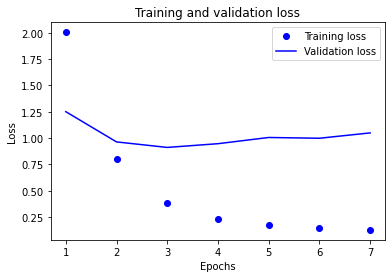

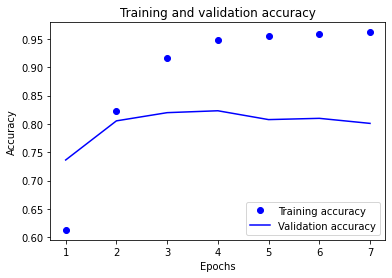

71/71 [==============================] - 0s 3ms/step - loss: 1.0558 - accuracy: 0.7961
['loss', 'accuracy']
[1.0558433532714844, 0.7960819005966187]
       loss  accuracy  val_loss  val_accuracy
2  0.387314  0.915378  0.911192      0.819800
3  0.226079  0.947297  0.946725      0.823137
4  0.169975  0.954720  1.005702      0.807564
5  0.142465  0.958060  0.998440      0.809789
6  0.126978  0.961524  1.049246      0.800890


Total amount of time to execute this process is:  6.045651912689209


In [8]:
backend.clear_session()

start = time.time()

model = models.Sequential()
model.add(layers.Dense(736, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(184, activation = 'relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=7,
                    batch_size=368, # I try to use a number that is n times of the output layer.
                    validation_data=(x_valid, y_valid))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(testing_data, testing_label)
print(model.metrics_names)
print(results)

hist = pd.DataFrame(history.history)
print(hist.tail())

end = time.time()
print("\n\nTotal amount of time to execute this process is: ", (end-start))

## Build 2 different sequential neural network models utilizing 2 differnt l_1 regularization values (l1 = 0.001 and l1 = 0.01) and early stopping.

Epoch 1/20
22/22 [==============================] - 1s 32ms/step - loss: 2.9281 - accuracy: 0.5199 - val_loss: 2.2902 - val_accuracy: 0.6207
Epoch 2/20
22/22 [==============================] - 1s 27ms/step - loss: 1.9138 - accuracy: 0.7031 - val_loss: 1.8356 - val_accuracy: 0.7052
Epoch 3/20
22/22 [==============================] - 1s 27ms/step - loss: 1.4912 - accuracy: 0.7673 - val_loss: 1.6235 - val_accuracy: 0.7620
Epoch 4/20
22/22 [==============================] - 1s 27ms/step - loss: 1.2021 - accuracy: 0.8326 - val_loss: 1.4966 - val_accuracy: 0.7820
Epoch 5/20
22/22 [==============================] - 1s 28ms/step - loss: 0.9988 - accuracy: 0.8708 - val_loss: 1.4253 - val_accuracy: 0.8031
Epoch 6/20
22/22 [==============================] - 1s 28ms/step - loss: 0.8547 - accuracy: 0.8973 - val_loss: 1.3845 - val_accuracy: 0.8087
Epoch 7/20
22/22 [==============================] - 1s 28ms/step - loss: 0.7413 - accuracy: 0.9253 - val_loss: 1.3383 - val_accuracy: 0.8109
Epoch 8/20
22

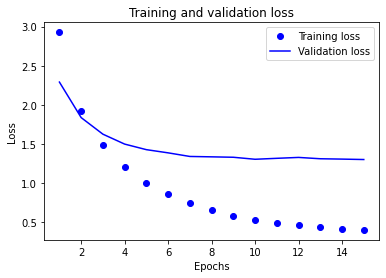

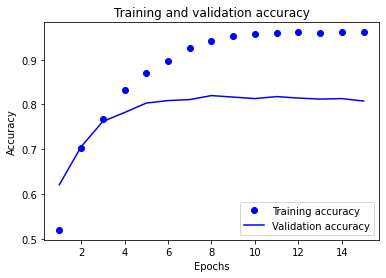

71/71 [==============================] - 0s 3ms/step - loss: 1.3751 - accuracy: 0.7988
['loss', 'accuracy']
[1.375143051147461, 0.7987533211708069]
        loss  accuracy  val_loss  val_accuracy
10  0.486416  0.959050  1.314535      0.817575
11  0.458883  0.960906  1.326047      0.814238
12  0.436761  0.959668  1.308931      0.812013
13  0.415468  0.961277  1.304436      0.813126
14  0.398155  0.961277  1.299047      0.807564


Total amount of time to execute this process is:  10.787643194198608


In [9]:
# Build a sequential neural network model utilizing  l_1 = 0.01 and early stopping.
backend.clear_session()

start = time.time()

model = models.Sequential()
model.add(layers.Dense(736, activation='relu', activity_regularizer = regularizers.l1(0.01), input_shape=(10000,)))
model.add(layers.Dense(184, activation = 'relu', activity_regularizer = regularizers.l1(0.01)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=368, # I try to use a number that is n times of the output layer.
                    validation_data=(x_valid, y_valid),
                    callbacks=[EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(testing_data, testing_label)
print(model.metrics_names)
print(results)

hist = pd.DataFrame(history.history)
print(hist.tail())

end = time.time()
print("\n\nTotal amount of time to execute this process is: ", (end-start))

Epoch 1/20
22/22 [==============================] - 1s 32ms/step - loss: 2.2051 - accuracy: 0.5886 - val_loss: 1.4969 - val_accuracy: 0.7297
Epoch 2/20
22/22 [==============================] - 1s 29ms/step - loss: 1.0703 - accuracy: 0.8004 - val_loss: 1.1510 - val_accuracy: 0.8053
Epoch 3/20
22/22 [==============================] - 1s 27ms/step - loss: 0.6486 - accuracy: 0.8998 - val_loss: 1.0452 - val_accuracy: 0.8187
Epoch 4/20
22/22 [==============================] - 1s 26ms/step - loss: 0.4311 - accuracy: 0.9427 - val_loss: 1.0105 - val_accuracy: 0.8165
Epoch 5/20
22/22 [==============================] - 1s 28ms/step - loss: 0.3302 - accuracy: 0.9539 - val_loss: 0.9883 - val_accuracy: 0.8242
Epoch 6/20
22/22 [==============================] - 1s 27ms/step - loss: 0.2831 - accuracy: 0.9594 - val_loss: 0.9989 - val_accuracy: 0.8131
Epoch 7/20
22/22 [==============================] - 1s 27ms/step - loss: 0.2548 - accuracy: 0.9589 - val_loss: 0.9928 - val_accuracy: 0.8065
Epoch 8/20
22

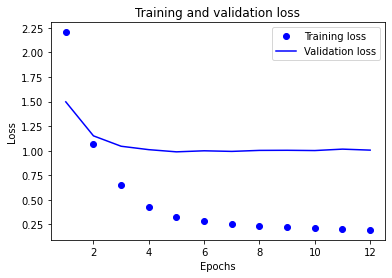

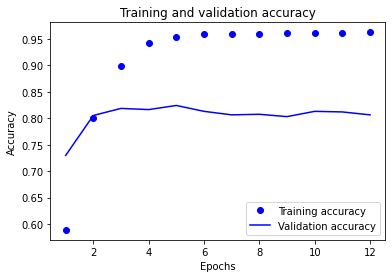

71/71 [==============================] - 0s 4ms/step - loss: 1.0328 - accuracy: 0.8028
['loss', 'accuracy']
[1.0327568054199219, 0.8027604818344116]
        loss  accuracy  val_loss  val_accuracy
7   0.234454  0.959297  1.003054      0.807564
8   0.220460  0.960658  1.004106      0.803115
9   0.208803  0.961277  1.001421      0.813126
10  0.199109  0.961895  1.015852      0.812013
11  0.193939  0.962885  1.005696      0.806452


Total amount of time to execute this process is:  8.992536306381226


In [10]:
# Build a sequential neural network model utilizing  l_1 = 0.001 and early stopping.
backend.clear_session()

start = time.time()

model = models.Sequential()
model.add(layers.Dense(736, activation='relu', activity_regularizer = regularizers.l1(0.001), input_shape=(10000,)))
model.add(layers.Dense(184, activation = 'relu', activity_regularizer = regularizers.l1(0.001)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=368, # I try to use a number that is n times of the output layer.
                    validation_data=(x_valid, y_valid),
                    callbacks=[EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(testing_data, testing_label)
print(model.metrics_names)
print(results)

hist = pd.DataFrame(history.history)
print(hist.tail())

end = time.time()
print("\n\nTotal amount of time to execute this process is: ", (end-start))

### Comment on how the different l1 regularization values affected the speed and accuracy of the model. (5 points)


I ran both l1 regularizations (l1 = 0.01 and = 0.001) more than 20 times each. Moreover, I ran them with both *kernel* and *activity* regularizations (REG). First thing that I noticed is about the comparision of the methods. *Kernel* REG requires a lot more epochs to converge. Among my trials *val_accuracy* metrics got its best value at 75th epoch with "0.7909" (l1 = 0.001). Yet, it was not good enough to provide a value close to a version running with *activity* REG. When ran it for *l1=0.01* (kernel REG) that was even worse. It was still converging at 100th epoch where *val_accuracy=0.6485*. So eventually I ruled out *kernel REG*. I do not know the difference between these two methods yet, so I cannot tell if this situation is applicable to this data or a situation that can be generalized for all cases.
I continued with *activity REG* from this point. Speed and accuracy-wise, I compared *l1=0.001* and *l1=0.01* many times. At all times, *l1=0.001* is faster and it was also more accurate except once. *l1=0.001* is better to go with for this data set (or maybe in general).

## Build 2 different sequential neural network model(s) utilizing 2 differnt l_2 regularization values (l1 = 0.001 and l1 = 0.01) and early stopping.

Epoch 1/20
22/22 [==============================] - 1s 37ms/step - loss: 2.3220 - accuracy: 0.5795 - val_loss: 1.7166 - val_accuracy: 0.7041
Epoch 2/20
22/22 [==============================] - 1s 31ms/step - loss: 1.3391 - accuracy: 0.7755 - val_loss: 1.3827 - val_accuracy: 0.7742
Epoch 3/20
22/22 [==============================] - 1s 29ms/step - loss: 0.9290 - accuracy: 0.8682 - val_loss: 1.2312 - val_accuracy: 0.7964
Epoch 4/20
22/22 [==============================] - 1s 30ms/step - loss: 0.6854 - accuracy: 0.9207 - val_loss: 1.1823 - val_accuracy: 0.8098
Epoch 5/20
22/22 [==============================] - 1s 29ms/step - loss: 0.5416 - accuracy: 0.9447 - val_loss: 1.1620 - val_accuracy: 0.8042
Epoch 6/20
22/22 [==============================] - 1s 29ms/step - loss: 0.4560 - accuracy: 0.9539 - val_loss: 1.1429 - val_accuracy: 0.8042
Epoch 7/20
22/22 [==============================] - 1s 29ms/step - loss: 0.4023 - accuracy: 0.9584 - val_loss: 1.1301 - val_accuracy: 0.8042
Epoch 8/20
22

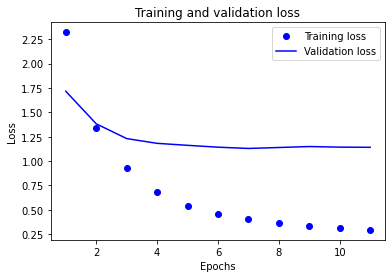

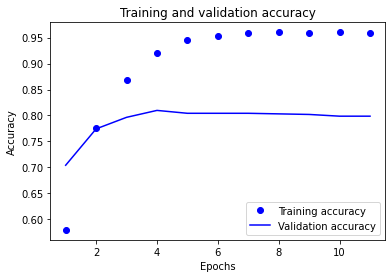

71/71 [==============================] - 0s 4ms/step - loss: 1.2254 - accuracy: 0.7858
['loss', 'accuracy']
[1.2254263162612915, 0.7858415246009827]
        loss  accuracy  val_loss  val_accuracy
6   0.402297  0.958431  1.130057      0.804227
7   0.363625  0.960163  1.139611      0.803115
8   0.333349  0.958308  1.149595      0.802002
9   0.309905  0.960411  1.143343      0.798665
10  0.294235  0.959421  1.141624      0.798665


Total amount of time to execute this process is:  8.966890573501587


In [18]:
# Build a sequential neural network model utilizing  l_2 = 0.01 and early stopping.
backend.clear_session()

start = time.time()

model = models.Sequential()
model.add(layers.Dense(736, activation='relu', activity_regularizer = regularizers.l2(0.01), input_shape=(10000,)))
model.add(layers.Dense(184, activation = 'relu', activity_regularizer = regularizers.l2(0.01)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=368, # I try to use a number that is n times of the output layer.
                    validation_data=(x_valid, y_valid),
                    callbacks=[EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(testing_data, testing_label)
print(model.metrics_names)
print(results)

hist = pd.DataFrame(history.history)
print(hist.tail())

end = time.time()
print("\n\nTotal amount of time to execute this process is: ", (end-start))

Epoch 1/20
22/22 [==============================] - 1s 33ms/step - loss: 2.1228 - accuracy: 0.5994 - val_loss: 1.4165 - val_accuracy: 0.7319
Epoch 2/20
22/22 [==============================] - 1s 28ms/step - loss: 0.9870 - accuracy: 0.8058 - val_loss: 1.0841 - val_accuracy: 0.7953
Epoch 3/20
22/22 [==============================] - 1s 28ms/step - loss: 0.5665 - accuracy: 0.9000 - val_loss: 0.9937 - val_accuracy: 0.8154
Epoch 4/20
22/22 [==============================] - 1s 28ms/step - loss: 0.3624 - accuracy: 0.9449 - val_loss: 0.9723 - val_accuracy: 0.8209
Epoch 5/20
22/22 [==============================] - 1s 39ms/step - loss: 0.2743 - accuracy: 0.9543 - val_loss: 0.9600 - val_accuracy: 0.8131
Epoch 6/20
22/22 [==============================] - 1s 27ms/step - loss: 0.2290 - accuracy: 0.9581 - val_loss: 0.9548 - val_accuracy: 0.8131
Epoch 7/20
22/22 [==============================] - 1s 26ms/step - loss: 0.2036 - accuracy: 0.9598 - val_loss: 0.9617 - val_accuracy: 0.7942
Epoch 8/20
22

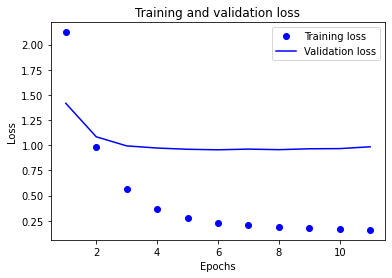

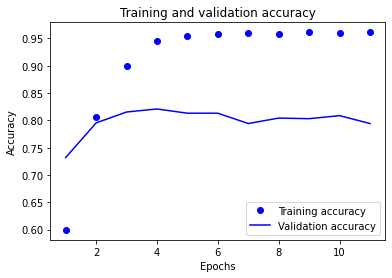

71/71 [==============================] - 0s 4ms/step - loss: 1.0009 - accuracy: 0.8019
['loss', 'accuracy']
[1.0008788108825684, 0.8018699884414673]
        loss  accuracy  val_loss  val_accuracy
6   0.203556  0.959792  0.961681      0.794216
7   0.188765  0.958308  0.956093      0.804227
8   0.177013  0.961400  0.964914      0.803115
9   0.169580  0.960040  0.966743      0.808676
10  0.158819  0.961153  0.984636      0.794216


Total amount of time to execute this process is:  8.874007225036621


In [12]:
# Build a sequential neural network model utilizing  l_2 = 0.001 and early stopping.
backend.clear_session()

start = time.time()

model = models.Sequential()
model.add(layers.Dense(736, activation='relu', activity_regularizer = regularizers.l2(0.001), input_shape=(10000,)))
model.add(layers.Dense(184, activation = 'relu', activity_regularizer = regularizers.l2(0.001)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=368, # I try to use a number that is n times of the output layer.
                    validation_data=(x_valid, y_valid),
                    callbacks=[EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(testing_data, testing_label)
print(model.metrics_names)
print(results)

hist = pd.DataFrame(history.history)
print(hist.tail())

end = time.time()
print("\n\nTotal amount of time to execute this process is: ", (end-start))

### Comment on how the different l2 regularization values affected the speed and accuracy of the model and how did they compare, respectively to the l1 regularization? (5 points)

I observed similar results from *l1 REG* in *l2 REG* as well. Smaller *l2* value provides better results and also it is faster. It converges quicker too.

Comparision of l2 vs l1 is another subject, though. First of all it does not make sense to me using both of them at the same time in a model, since one of them (l1) focusing on eliminating or reducing the effect of some variables, whereas the other (l2) tries to equally emphasize all variables. But I have not experimented on it yet and I will share my opinion on this at the end. It seems *l2* is faster in general, however, for hyperparameters equal to 0.001, they both are very close to each other in terms of speed. Accuraccy-wise, even though they are produce close results *l1* seems a better option. Now, considering our data set, which makes more sense to go with, if you would ask in the beginning? I guess I would say *l1*, becuase a group of selective words in a comment would make the difference to mark a comment if it is positive or negative rather than all of the words matter for the outcome. Does our test results support this idea as if it is an evidence to it? Somewhat yes, but I would go with a "no", since the difference betwween the two REG does not seem significant to me.

## Build 2 different sequential neural network model(s) utilizing dropouts (0.5 and 0.2) and early stopping.

Epoch 1/20
22/22 [==============================] - 1s 33ms/step - loss: 2.3392 - accuracy: 0.5054 - val_loss: 1.4969 - val_accuracy: 0.6796
Epoch 2/20
22/22 [==============================] - 1s 29ms/step - loss: 1.2888 - accuracy: 0.7099 - val_loss: 1.1986 - val_accuracy: 0.7475
Epoch 3/20
22/22 [==============================] - 1s 30ms/step - loss: 0.9519 - accuracy: 0.7798 - val_loss: 1.0361 - val_accuracy: 0.7920
Epoch 4/20
22/22 [==============================] - 1s 30ms/step - loss: 0.7021 - accuracy: 0.8352 - val_loss: 0.9500 - val_accuracy: 0.8120
Epoch 5/20
22/22 [==============================] - 1s 29ms/step - loss: 0.5154 - accuracy: 0.8776 - val_loss: 0.9406 - val_accuracy: 0.8098
Epoch 6/20
22/22 [==============================] - 1s 30ms/step - loss: 0.3816 - accuracy: 0.9091 - val_loss: 0.9537 - val_accuracy: 0.8142
Epoch 7/20
22/22 [==============================] - 1s 30ms/step - loss: 0.3031 - accuracy: 0.9277 - val_loss: 0.9736 - val_accuracy: 0.8154
Epoch 8/20
22

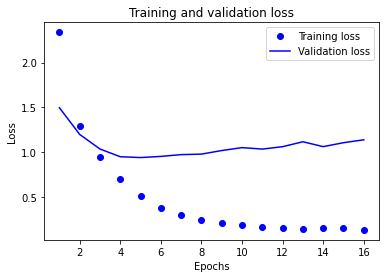

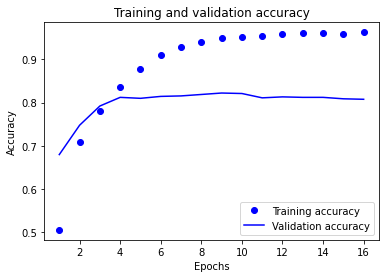

71/71 [==============================] - 0s 4ms/step - loss: 1.0594 - accuracy: 0.8090
['loss', 'accuracy']
[1.0593581199645996, 0.8089937567710876]
        loss  accuracy  val_loss  val_accuracy
11  0.156543  0.957442  1.062130      0.813126
12  0.147390  0.960287  1.117185      0.812013
13  0.149479  0.960411  1.062573      0.812013
14  0.149523  0.959421  1.106639      0.808676
15  0.133322  0.962638  1.138927      0.807564


Total amount of time to execute this process is:  12.828428745269775


In [16]:
# Build a sequential neural network model utilizing dropout = 0.05 and early stopping.
backend.clear_session()

start = time.time()

model = models.Sequential()
model.add(layers.Dense(736, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(184, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=368, # I try to use a number that is n times of the output layer.
                    validation_data=(x_valid, y_valid),
                    callbacks=[EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights = True)])


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(testing_data, testing_label)
print(model.metrics_names)
print(results)

hist = pd.DataFrame(history.history)
print(hist.tail())

end = time.time()
print("\n\nTotal amount of time to execute this process is: ", (end-start))

Epoch 1/20
22/22 [==============================] - 1s 35ms/step - loss: 2.2130 - accuracy: 0.5338 - val_loss: 1.4409 - val_accuracy: 0.7030
Epoch 2/20
22/22 [==============================] - 1s 31ms/step - loss: 1.1483 - accuracy: 0.7370 - val_loss: 1.0869 - val_accuracy: 0.7786
Epoch 3/20
22/22 [==============================] - 1s 29ms/step - loss: 0.7515 - accuracy: 0.8278 - val_loss: 0.9585 - val_accuracy: 0.8042
Epoch 4/20
22/22 [==============================] - 1s 29ms/step - loss: 0.5077 - accuracy: 0.8854 - val_loss: 0.9279 - val_accuracy: 0.8142
Epoch 5/20
22/22 [==============================] - 1s 28ms/step - loss: 0.3377 - accuracy: 0.9226 - val_loss: 0.9200 - val_accuracy: 0.8120
Epoch 6/20
22/22 [==============================] - 1s 30ms/step - loss: 0.2503 - accuracy: 0.9394 - val_loss: 0.9553 - val_accuracy: 0.8098
Epoch 7/20
22/22 [==============================] - 1s 31ms/step - loss: 0.2074 - accuracy: 0.9487 - val_loss: 0.9998 - val_accuracy: 0.8120
Epoch 8/20
22

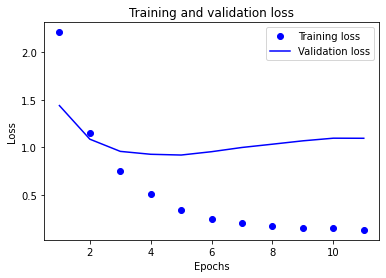

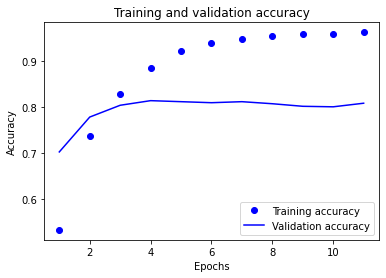

71/71 [==============================] - 0s 4ms/step - loss: 0.9528 - accuracy: 0.7916
['loss', 'accuracy']
[0.9527505040168762, 0.7916295528411865]
        loss  accuracy  val_loss  val_accuracy
6   0.207418  0.948658  0.999758      0.812013
7   0.173723  0.953854  1.034292      0.807564
8   0.152337  0.958802  1.069619      0.802002
9   0.146714  0.957936  1.097399      0.800890
10  0.131521  0.962638  1.096507      0.808676


Total amount of time to execute this process is:  9.28521728515625


In [17]:
# Build a sequential neural network model utilizing dropout = 0.02 and early stopping.
backend.clear_session()

start = time.time()

model = models.Sequential()
model.add(layers.Dense(736, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(184, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=368, # I try to use a number that is n times of the output layer.
                    validation_data=(x_valid, y_valid),
                    callbacks=[EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(testing_data, testing_label)
print(model.metrics_names)
print(results)

hist = pd.DataFrame(history.history)
print(hist.tail())

end = time.time()
print("\n\nTotal amount of time to execute this process is: ", (end-start))

### Comment on how the different dropouts  values affected the speed and accuracy of the model and how did they compare, respectively to the l1 and l2 regularization? (5 points)

It takes longer to finish the process, as well as to converge, when the *drop out* rate is higher at the input layer. I repeated the this step somewhat 20 times or so and what I noticed is that results deviate a lot in terms of accuracy. Sometimes lower 0.79s sometimes higher 0.80s. On the other hand, other REGs provide more standard results. It might be a good idea to try this with other REGs to see if it can provide a performance incease.

## Build a sequential neural network model utilizing batch normalization and early stopping.


Epoch 1/20
22/22 [==============================] - 1s 37ms/step - loss: 1.6061 - accuracy: 0.6882 - val_loss: 3.0433 - val_accuracy: 0.7775
Epoch 2/20
22/22 [==============================] - 1s 32ms/step - loss: 0.3292 - accuracy: 0.9367 - val_loss: 2.8453 - val_accuracy: 0.7430
Epoch 3/20
22/22 [==============================] - 1s 31ms/step - loss: 0.1677 - accuracy: 0.9573 - val_loss: 2.6231 - val_accuracy: 0.7230
Epoch 4/20
22/22 [==============================] - 1s 32ms/step - loss: 0.1309 - accuracy: 0.9582 - val_loss: 2.3981 - val_accuracy: 0.7141
Epoch 5/20
22/22 [==============================] - 1s 32ms/step - loss: 0.1098 - accuracy: 0.9604 - val_loss: 2.1796 - val_accuracy: 0.7353
Epoch 6/20
22/22 [==============================] - 1s 31ms/step - loss: 0.1087 - accuracy: 0.9592 - val_loss: 1.9613 - val_accuracy: 0.7364
Epoch 7/20
22/22 [==============================] - 1s 32ms/step - loss: 0.1010 - accuracy: 0.9600 - val_loss: 1.7593 - val_accuracy: 0.7442
Epoch 8/20
22

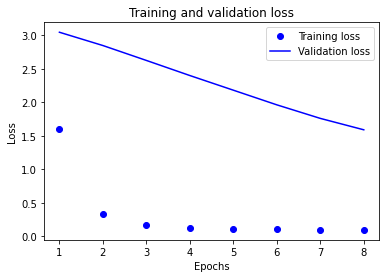

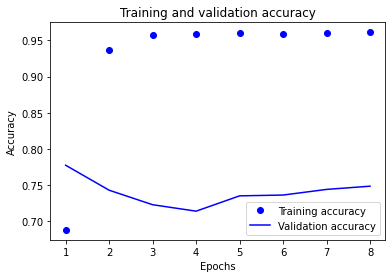

71/71 [==============================] - 0s 4ms/step - loss: 3.0677 - accuracy: 0.7556
['loss', 'accuracy']
[3.0676753520965576, 0.7555654644966125]
       loss  accuracy  val_loss  val_accuracy
3  0.130879  0.958184  2.398051      0.714127
4  0.109835  0.960411  2.179643      0.735261
5  0.108735  0.959174  1.961312      0.736374
6  0.101020  0.960040  1.759306      0.744160
7  0.097032  0.961153  1.589282      0.748610


Total amount of time to execute this process is:  7.573275804519653


In [26]:
# Build a sequential neural network model utilizing bach normalization and early stopping.
backend.clear_session()

start = time.time()

model = models.Sequential()
model.add(layers.Dense(736, activation='relu', input_shape=(10000,)))
model.add(BatchNormalization())
model.add(layers.Dense(184, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=368, # I try to use a number that is n times of the output layer.
                    validation_data=(x_valid, y_valid),
                    callbacks=[EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(testing_data, testing_label)
print(model.metrics_names)
print(results)

hist = pd.DataFrame(history.history)
print(hist.tail())

end = time.time()
print("\n\nTotal amount of time to execute this process is: ", (end-start))

### Comment on how batch normalization affected the speed and accuracy of the model and how did it compare, respectively to the l1, l2, and dropout regularization? (5 points)

With the given hyperparameters Batch Normalization works the fastest among them, however, it requires longer epochs, becuase the convergence of this REG methods takes longer. And when we do not give enough room for the *"patience"* it finishes the process quickly without finding the optimal metrics. One thing that I noticed was that it might have worked better if follows *val_loss* rather than following *val_accuaracy*. My experimentations showed me that best outcome can be acquired by using 60 epoch and 30 patience. If I switch to *val_loss* to monitor the model development, around 16-17 epochs it finds the optimal model. Nevertheless, using Batch Normalization with other REG methods sounds the best idea, because it normalizes values at all times.

## Build your best model utilizing all or some of regularization, batch normalization, dropouts, and an early stopping.

Epoch 1/660
22/22 [==============================] - 1s 61ms/step - loss: 2.3802 - accuracy: 0.5061 - val_loss: 2.7074 - val_accuracy: 0.7419
Epoch 2/660
22/22 [==============================] - 1s 51ms/step - loss: 1.1633 - accuracy: 0.7639 - val_loss: 2.3212 - val_accuracy: 0.7464
Epoch 3/660
22/22 [==============================] - 1s 49ms/step - loss: 0.7978 - accuracy: 0.8353 - val_loss: 2.1230 - val_accuracy: 0.7397
Epoch 4/660
22/22 [==============================] - 1s 46ms/step - loss: 0.5663 - accuracy: 0.8814 - val_loss: 1.8947 - val_accuracy: 0.7375
Epoch 5/660
22/22 [==============================] - 1s 49ms/step - loss: 0.4222 - accuracy: 0.9119 - val_loss: 1.6875 - val_accuracy: 0.7397
Epoch 6/660
22/22 [==============================] - 1s 48ms/step - loss: 0.3322 - accuracy: 0.9280 - val_loss: 1.5128 - val_accuracy: 0.7397
Epoch 7/660
22/22 [==============================] - 1s 47ms/step - loss: 0.2725 - accuracy: 0.9400 - val_loss: 1.3339 - val_accuracy: 0.7453
Epoch 

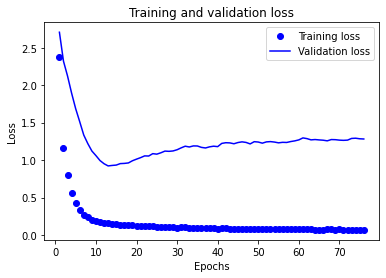

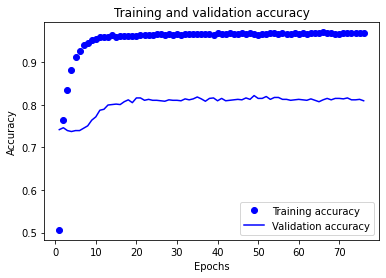

71/71 [==============================] - 0s 4ms/step - loss: 1.3414 - accuracy: 0.8130
['loss', 'accuracy']
[1.3413652181625366, 0.8130009174346924]
        loss  accuracy  val_loss  val_accuracy
71  0.070768  0.969318  1.266720      0.816463
72  0.069882  0.969689  1.289173      0.812013
73  0.071128  0.968205  1.292060      0.812013
74  0.072214  0.968081  1.284513      0.813126
75  0.067387  0.969689  1.281708      0.809789


Total amount of time to execute this process is:  68.76488733291626


In [79]:
# Build your best model utilizing all or some of regularization, batch normalization, dropouts, and an early stopping.
# See if you can get accuracy on the test data above 0.80.

# backend.clear_session()

start = time.time()

model = models.Sequential()
# model.add(layers.Dense(736, activation='relu', activity_regularizer = regularizers.l1(0.001), input_shape=(10000,)))
model.add(layers.Dense(736, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(BatchNormalization())
# model.add(layers.Dense(184, activation = 'relu', activity_regularizer = regularizers.l1(0.001)))
model.add(layers.Dense(184, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(BatchNormalization())
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=660,
                    batch_size=368, # I try to use a number that is n times of the output layer.
                    validation_data=(x_valid, y_valid),
                    callbacks=[EarlyStopping(monitor='val_accuracy', patience=27, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(testing_data, testing_label)
print(model.metrics_names)
print(results)

hist = pd.DataFrame(history.history)
print(hist.tail())

end = time.time()
print("\n\nTotal amount of time to execute this process is: ", (end-start))

### Comment on which techniques you used to build the best model with the highest accuracy.

I have discovered two models that gives the best results:
1- A mix of batch normalization (BN) and drop out (DO)
2- A mix of l1 REG and drop out (DO).

I was expecting a something like this, because DO results were flactuating a lot, but also DO was able to produce best results time to time. It need something to regulate this flactuating behavior. Even though it takes significantly longer than the others, the very best results can be acquired a match up of BN and DO, however, the number epochs is a lot.
A quick but close outcome can be acquired by the match up of l1 REG and DO. I was able to get scores between 0.8050 - 0.08110 with this method and I can use the generic hyperparameters that I have used (epochs=20, patience=7)